In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df_train=pd.read_csv('bigdatamart_train.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df_test=pd.read_csv('bigmartdata_test.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
print('Train dataset shape is',df_train.shape)

Train dataset shape is (8523, 12)


In [5]:
print('Test dataset shape is',df_test.shape)

Test dataset shape is (5681, 11)


In [6]:
print('Columns of test dataset = ',*df_test.columns)

Columns of test dataset =  Item_Identifier Item_Weight Item_Fat_Content Item_Visibility Item_Type Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Location_Type Outlet_Type


In [7]:
print('Columns of train dataset =',*df_train.columns)

Columns of train dataset = Item_Identifier Item_Weight Item_Fat_Content Item_Visibility Item_Type Item_MRP Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Location_Type Outlet_Type Item_Outlet_Sales


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


from the above information of both dataset we see that that item_outlet_sales is not included in the test dataset and also it is our independent variable and rest all are our dependent variable

In [10]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# EDA, VISUALIZATION & CLEANING

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

as we can see that there are nan values present in item weight and outlet size so we will replace it by using mean for item weight and mode for outlet size

In [14]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

In [15]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [17]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
df_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [22]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [23]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

except for item_identifier rest all categorical values can be easily converted into numerical data
conv item_identifier column into a proper categorical column on both and test dataset

In [24]:
df_train['ItemID']=0

In [25]:
for i in range(len(df_train.Item_Identifier)):
    df_train.ItemID[i]=df_train.Item_Identifier[i][:2]

In [26]:
df_train['ItemID'].value_counts()

FD    6125
NC    1599
DR     799
Name: ItemID, dtype: int64

In [27]:
df_test['ItemID']=0

In [28]:
for i in range(len(df_test.Item_Identifier)):
    df_test.ItemID[i]=df_test.Item_Identifier[i][:2]

In [29]:
df_test['ItemID'].value_counts()

FD    4076
NC    1087
DR     518
Name: ItemID, dtype: int64

In [30]:
df_train= df_train[['ItemID', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type',
                   'Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type',
                    'Outlet_Type','Item_Outlet_Sales']]

In [31]:
df_test= df_test[['ItemID', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility','Item_Type',
                   'Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type',
                    'Outlet_Type']]

the dataset is till 2013 we should change the establishment year data to number of years company established

In [32]:
for i in range(len(df_train['Outlet_Establishment_Year'])):
    df_train.Outlet_Establishment_Year[i]=2013-df_train.Outlet_Establishment_Year[i]
df_train

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,26,High,Tier 3,Supermarket Type1,2778.3834
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,11,NaN,Tier 2,Supermarket Type1,549.2850
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,9,Small,Tier 2,Supermarket Type1,1193.1136
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,4,Medium,Tier 3,Supermarket Type2,1845.5976


In [33]:
for i in range(len(df_test['Outlet_Establishment_Year'])):
    df_test.Outlet_Establishment_Year[i]=2013-df_test.Outlet_Establishment_Year[i]
df_test

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,14,Medium,Tier 1,Supermarket Type1
1,FD,8.300000,reg,0.038428,Dairy,87.3198,OUT017,6,NaN,Tier 2,Supermarket Type1
2,NC,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,15,NaN,Tier 3,Grocery Store
3,FD,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,6,NaN,Tier 2,Supermarket Type1
4,FD,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,28,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,16,Small,Tier 1,Supermarket Type1
5677,FD,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,4,Medium,Tier 3,Supermarket Type2
5678,NC,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,11,NaN,Tier 2,Supermarket Type1
5679,FD,15.300000,Regular,0.000000,Canned,214.6218,OUT017,6,NaN,Tier 2,Supermarket Type1


In [34]:
df_train['New_Item_Type'] = df_train['ItemID'].apply(lambda x: x[:2])
df_train['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [35]:
df_train['New_Item_Type'] = df_train['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_train['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [36]:
df_test['New_Item_Type'] = df_test['ItemID'].apply(lambda x: x[:2])
df_test['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [37]:
df_test['New_Item_Type'] = df_test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df_test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

# encoding the object type data into numeric for both train as well as test data set

In [38]:
le=LabelEncoder()
cat_col=['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Type','Item_Fat_Content','New_Item_Type','ItemID']
df_train['outlet']=le.fit_transform(df_train['Outlet_Identifier'])

In [39]:
for col in cat_col:
    df_train[col]=le.fit_transform(df_train[col])

In [40]:
df_train

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,outlet
0,1,9.300,1,0.016047,4,249.8092,OUT049,14,1,0,1,3735.1380,1,9
1,0,5.920,2,0.019278,14,48.2692,OUT018,4,1,2,2,443.4228,0,3
2,1,17.500,1,0.016760,10,141.6180,OUT049,14,1,0,1,2097.2700,1,9
3,1,19.200,2,0.000000,6,182.0950,OUT010,15,3,2,0,732.3800,1,0
4,2,8.930,1,0.000000,9,53.8614,OUT013,26,0,2,1,994.7052,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,1,0.056783,13,214.5218,OUT013,26,0,2,1,2778.3834,1,1
8519,1,8.380,2,0.046982,0,108.1570,OUT045,11,3,1,1,549.2850,1,7
8520,2,10.600,1,0.035186,8,85.1224,OUT035,9,2,1,1,1193.1136,2,6
8521,1,7.210,2,0.145221,13,103.1332,OUT018,4,1,2,2,1845.5976,1,3


In [41]:
le=LabelEncoder()
cat_col=['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Type','Item_Fat_Content','New_Item_Type','ItemID']
df_test['outlet']=le.fit_transform(df_test['Outlet_Identifier'])
for col in cat_col:
    df_test[col]=le.fit_transform(df_test[col])
df_test

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,outlet
0,1,20.750000,1,0.007565,13,107.8622,OUT049,14,1,0,1,1,9
1,1,8.300000,4,0.038428,4,87.3198,OUT017,6,3,1,1,1,2
2,2,14.600000,1,0.099575,11,241.7538,OUT010,15,3,2,0,2,0
3,1,7.315000,1,0.015388,13,155.0340,OUT017,6,3,1,1,1,2
4,1,12.695633,2,0.118599,4,234.2300,OUT027,28,1,2,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,2,0.013496,13,141.3154,OUT046,16,2,0,1,1,8
5677,1,7.600000,2,0.142991,15,169.1448,OUT018,4,1,2,2,1,3
5678,2,10.000000,1,0.073529,8,118.7440,OUT045,11,3,1,1,2,7
5679,1,15.300000,2,0.000000,3,214.6218,OUT017,6,3,1,1,1,2


dropping columns 'Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier' as it is of no use to us after making new attributes  in both the dataset

In [42]:
df_train=df_train.drop(['Outlet_Identifier'],axis=1)

In [43]:
df_test.columns

Index(['ItemID', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'New_Item_Type', 'outlet'],
      dtype='object')

In [44]:
df_train

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,outlet
0,1,9.300,1,0.016047,4,249.8092,14,1,0,1,3735.1380,1,9
1,0,5.920,2,0.019278,14,48.2692,4,1,2,2,443.4228,0,3
2,1,17.500,1,0.016760,10,141.6180,14,1,0,1,2097.2700,1,9
3,1,19.200,2,0.000000,6,182.0950,15,3,2,0,732.3800,1,0
4,2,8.930,1,0.000000,9,53.8614,26,0,2,1,994.7052,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,1,0.056783,13,214.5218,26,0,2,1,2778.3834,1,1
8519,1,8.380,2,0.046982,0,108.1570,11,3,1,1,549.2850,1,7
8520,2,10.600,1,0.035186,8,85.1224,9,2,1,1,1193.1136,2,6
8521,1,7.210,2,0.145221,13,103.1332,4,1,2,2,1845.5976,1,3


In [45]:
df_test=df_test.drop(['Outlet_Identifier'],axis=1)

In [46]:
df_test

,ItemID,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,outlet
0,1,20.750000,1,0.007565,13,107.8622,14,1,0,1,1,9
1,1,8.300000,4,0.038428,4,87.3198,6,3,1,1,1,2
2,2,14.600000,1,0.099575,11,241.7538,15,3,2,0,2,0
3,1,7.315000,1,0.015388,13,155.0340,6,3,1,1,1,2
4,1,12.695633,2,0.118599,4,234.2300,28,1,2,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,10.500000,2,0.013496,13,141.3154,16,2,0,1,1,8
5677,1,7.600000,2,0.142991,15,169.1448,4,1,2,2,1,3
5678,2,10.000000,1,0.073529,8,118.7440,11,3,1,1,2,7
5679,1,15.300000,2,0.000000,3,214.6218,6,3,1,1,1,2


# Visualization

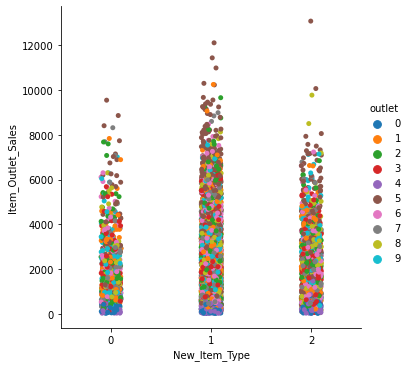

In [47]:
sns.catplot(x='New_Item_Type',y='Item_Outlet_Sales',hue='outlet',data=df_train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

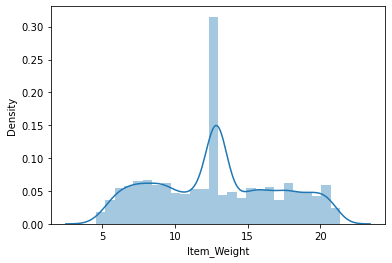

In [48]:
sns.distplot(df_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

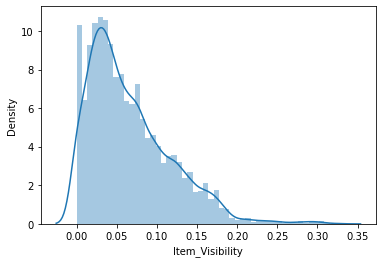

In [49]:
sns.distplot(df_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

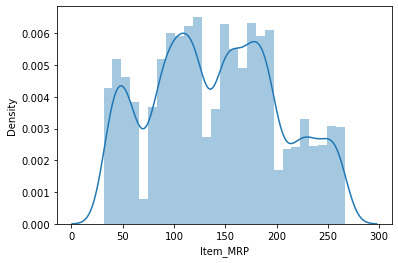

In [50]:
sns.distplot(df_train['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

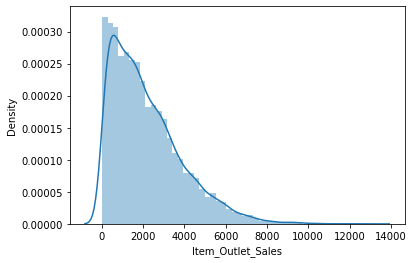

In [51]:
sns.distplot(df_train['Item_Outlet_Sales'])

# from above we can see that there is skewness present in the data

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

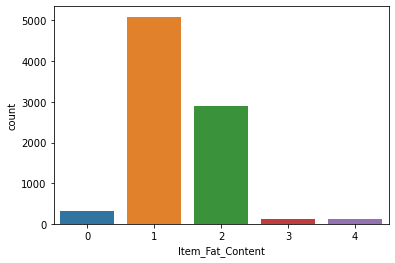

In [52]:
sns.countplot(df_train['Item_Fat_Content'])

[Text(0, 0, '4'),
 Text(1, 0, '14'),
 Text(2, 0, '10'),
 Text(3, 0, '6'),
 Text(4, 0, '9'),
 Text(5, 0, '0'),
 Text(6, 0, '13'),
 Text(7, 0, '5'),
 Text(8, 0, '2'),
 Text(9, 0, '8'),
 Text(10, 0, '7'),
 Text(11, 0, '3'),
 Text(12, 0, '1'),
 Text(13, 0, '15'),
 Text(14, 0, '11'),
 Text(15, 0, '12')]

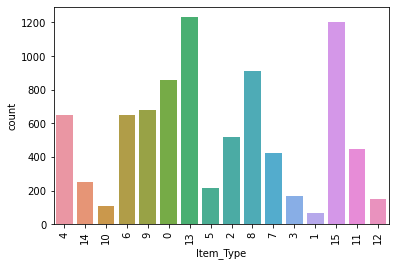

In [53]:
l = list(df_train['Item_Type'].unique())
chart = sns.countplot(df_train["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

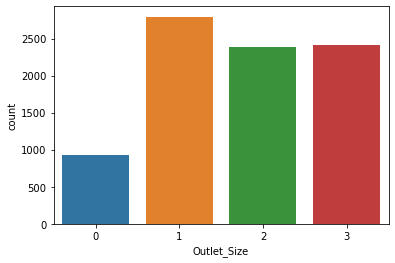

In [54]:
sns.countplot(df_train['Outlet_Size'])

<AxesSubplot:xlabel='New_Item_Type', ylabel='count'>

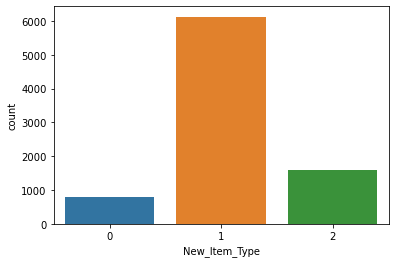

In [55]:
sns.countplot(df_train['New_Item_Type'])

checking for outliers

ItemID                          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Item_Weight                  AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Item_Fat_Content             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Item_Visibility              AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Item_Type                    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Item_MRP                     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Outlet_Size                        AxesSubplot(0.125,0.125;0.0945122x0.343182)
Outlet_Location_Type            AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Outlet_Type                     AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Item_Outlet_Sales               AxesSubplot(0.465244,0.125;0.0945122x0.343182)
New_Item_Type                   AxesSubplot(0.578659,0.125;0.0945122x0.343182)
outlet                          AxesSubplot(0.692073

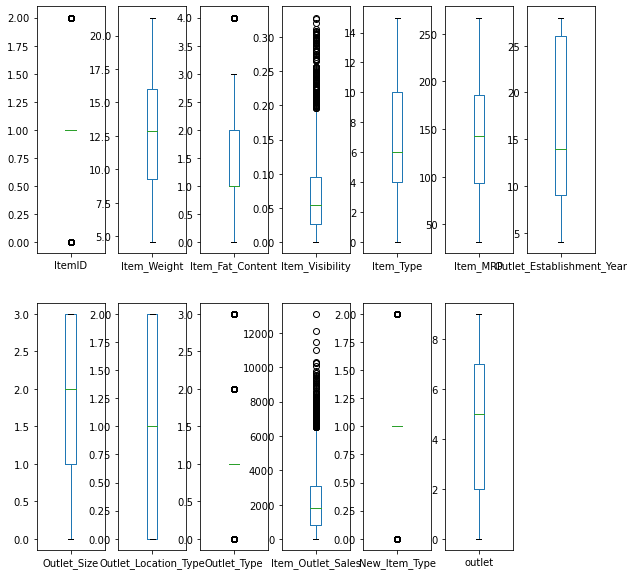

In [56]:
df_train.plot(kind='box',subplots=True,layout=(2,7),figsize=(10,10))

# From the above we can conclude that the outliers are present in the Categorical data and which are valid so no need to remove outliers

<AxesSubplot:>

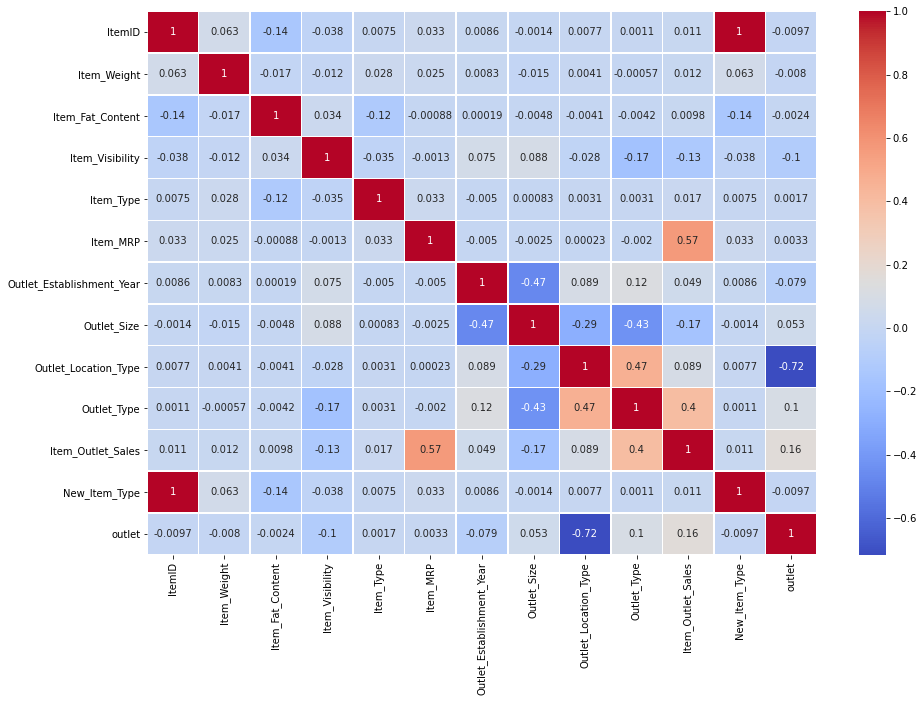

In [57]:
plt.figure(figsize=(15,10))
corr=df_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidth=0.5)

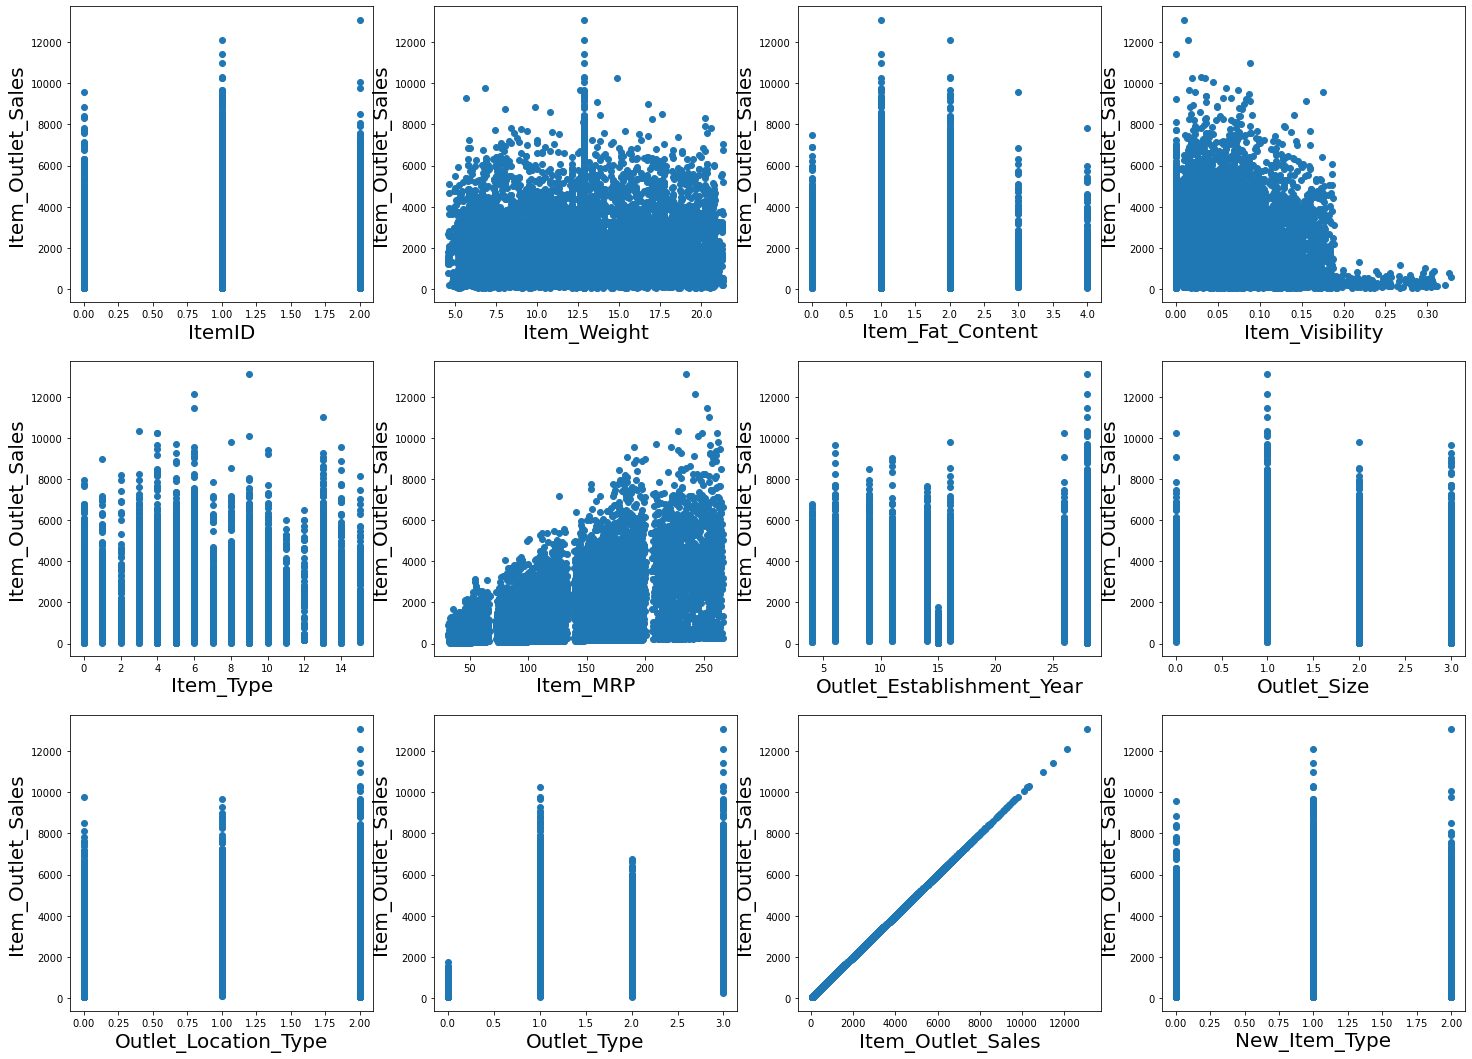

In [58]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for i in df_train.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(df_train[i],df_train['Item_Outlet_Sales'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnumber+=1
plt.show()

Higher the oulet size lesser is the sales

Outlet_location_type 3 has more chances of higher sales

Outlet_type 4 has more chances of higher sales

Outlet_establishment_year of the oldest year has more chances of higher sales

higher the cost higher the sales

item type, item id, item weight does not provide proper insight in sales data

low fat products have higher sales

lesser visibility item have more chances of higher sales


In [59]:
df_train=df_train.drop(['ItemID','Item_Weight','Item_Type'],axis=1)

In [60]:
df_test=df_test.drop(['ItemID','Item_Weight','Item_Type'],axis=1)

In [61]:
df_train.skew()

Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year    0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
New_Item_Type                0.114510
outlet                      -0.059861
dtype: float64

In [62]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(df_train.drop(['Item_Outlet_Sales'],axis=1).values,i) for i in range(df_train.drop(['Item_Outlet_Sales'],axis=1).shape[1]) ]
vif["Features"] = df_train.drop(['Item_Outlet_Sales'],axis=1).columns
vif

,vif,Features
0,5.072965,Item_Fat_Content
1,2.710528,Item_Visibility
2,5.663345,Item_MRP
3,4.474789,Outlet_Establishment_Year
4,4.785614,Outlet_Size
5,9.711746,Outlet_Location_Type
6,8.691476,Outlet_Type
7,5.006802,New_Item_Type
8,9.777506,outlet


so no need to drop any columns after checking the vif

# removing skewness

In [63]:
x=df_train.drop(['Item_Outlet_Sales'],axis=1)
y=df_train['Item_Outlet_Sales']

In [64]:
x

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,outlet
0,1,0.016047,249.8092,14,1,0,1,1,9
1,2,0.019278,48.2692,4,1,2,2,0,3
2,1,0.016760,141.6180,14,1,0,1,1,9
3,2,0.000000,182.0950,15,3,2,0,1,0
4,1,0.000000,53.8614,26,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...
8518,1,0.056783,214.5218,26,0,2,1,1,1
8519,2,0.046982,108.1570,11,3,1,1,1,7
8520,1,0.035186,85.1224,9,2,1,1,2,6
8521,2,0.145221,103.1332,4,1,2,2,1,3


In [65]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method=('yeo-johnson'))
x

array([[-0.52097741, -1.14688621,  1.62367023, ..., -0.12348771,
        -0.17167574,  1.42739386],
       [ 1.00987141, -1.03709991, -1.59501643, ...,  1.04059102,
        -2.12615212, -0.54857657],
       [-0.52097741, -1.12237453,  0.08123678, ..., -0.12348771,
        -0.17167574,  1.42739386],
       ...,
       [-0.52097741, -0.54297932, -0.86792986, ..., -0.12348771,
         1.7200184 ,  0.48916807],
       [ 1.00987141,  1.45998957, -0.54899589, ...,  1.04059102,
        -0.17167574, -0.54857657],
       [-0.52097741, -0.27619496, -1.04722682, ..., -0.12348771,
        -2.12615212,  1.12284847]])

# feature scaling

In [66]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.52097741, -1.14688621,  1.62367023, ..., -0.12348771,
        -0.17167574,  1.42739386],
       [ 1.00987141, -1.03709991, -1.59501643, ...,  1.04059102,
        -2.12615212, -0.54857657],
       [-0.52097741, -1.12237453,  0.08123678, ..., -0.12348771,
        -0.17167574,  1.42739386],
       ...,
       [-0.52097741, -0.54297932, -0.86792986, ..., -0.12348771,
         1.7200184 ,  0.48916807],
       [ 1.00987141,  1.45998957, -0.54899589, ...,  1.04059102,
        -0.17167574, -0.54857657],
       [-0.52097741, -0.27619496, -1.04722682, ..., -0.12348771,
        -2.12615212,  1.12284847]])

# building models

In [67]:
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [68]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
score 0.5915060409734364
r2 0.6061029996586291
diff 0.014596958685192729


LinearRegression()
score 0.5181061320858757
r2 0.5421858501631247
diff 0.024079718077248957


Ridge()
score 0.5181068834725319
r2 0.5421805725219551
diff 0.024073689049423197


BayesianRidge()
score 0.5181075431573027
r2 0.5421458768963627
diff 0.024038333739060058


SGDRegressor()
score 0.5178606612397634
r2 0.541559324577161
diff 0.023698663337397674


SVR()
score 0.05161922068476259
r2 0.10198589863804486
diff 0.05036667795328227


AdaBoostRegressor()
score 0.49777130967164573
r2 0.5116455189090336
diff 0.013874209237387913


KNeighborsRegressor()
score 0.5105109393315208
r2 0.5410078700044514
diff 0.030496930672930578


RandomForestRegressor()
score 0.5454808364675319
r2 0.5636034738826229
diff 0.018122637415091014


BaggingRegressor()
score 0.5094479351800498
r2 0.5274257132729996
diff 0.01797777809294976


DecisionTreeRegressor()
score 0.19655035905333354
r2 0.18077811500838126


# gradient boosting is better in accuracy and with less difference as compared to others

In [ ]:
parameters={"n_estimators":[10,100,500],"criterion":['friedman_mse', 'mse','mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

In [73]:
gb=GradientBoostingRegressor(n_estimators=100,criterion='mse',max_features='auto')
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state =42,test_size=0.20)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
r2_score(y_test,y_pred)
print('r2 score of gradient boosting : ',r2_score(y_test,y_pred))

r2 score of gradient boosting :  0.6062014225459207


In [ ]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 76,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=500,criterion='mse',max_features='log2')
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)

coeff of determination is: 0.5964640985391925


In [89]:
y_pred

array([ 392.036356 , 1518.7337428,  963.2181864, ..., 4376.3193792,
       4969.804178 ,  903.6290864])

# Saving the model

In [79]:
joblib.dump(gb,'Bigmart.obj')

['Bigmart.obj']

# predicting the results with test data using the model that we saved(we have already done the preprocessing and eda required for the test data along side train dataset)

In [81]:
x=df_test
x

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,outlet
0,1,0.007565,107.8622,14,1,0,1,1,9
1,4,0.038428,87.3198,6,3,1,1,1,2
2,1,0.099575,241.7538,15,3,2,0,2,0
3,1,0.015388,155.0340,6,3,1,1,1,2
4,2,0.118599,234.2300,28,1,2,3,1,5
...,...,...,...,...,...,...,...,...,...
5676,2,0.013496,141.3154,16,2,0,1,1,8
5677,2,0.142991,169.1448,4,1,2,2,1,3
5678,1,0.073529,118.7440,11,3,1,1,2,7
5679,2,0.000000,214.6218,6,3,1,1,1,2


In [86]:
model=joblib.load('Bigmart.obj')
model

GradientBoostingRegressor(criterion='mse', max_features='auto')

In [88]:
ypred=model.predict(x)
ypred

array([4337.89855841, 4395.36811728, 4326.41710259, ..., 4395.36811728,
       4395.36811728, 4474.42405115])

In [92]:
df_test['item_outlet_sales']=ypred

In [96]:
df_train

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,outlet
0,1,0.016047,249.8092,14,1,0,1,3735.1380,1,9
1,2,0.019278,48.2692,4,1,2,2,443.4228,0,3
2,1,0.016760,141.6180,14,1,0,1,2097.2700,1,9
3,2,0.000000,182.0950,15,3,2,0,732.3800,1,0
4,1,0.000000,53.8614,26,0,2,1,994.7052,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,1,0.056783,214.5218,26,0,2,1,2778.3834,1,1
8519,2,0.046982,108.1570,11,3,1,1,549.2850,1,7
8520,1,0.035186,85.1224,9,2,1,1,1193.1136,2,6
8521,2,0.145221,103.1332,4,1,2,2,1845.5976,1,3


In [93]:
df_test

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,outlet,item_outlet_sales
0,1,0.007565,107.8622,14,1,0,1,1,9,4337.898558
1,4,0.038428,87.3198,6,3,1,1,1,2,4395.368117
2,1,0.099575,241.7538,15,3,2,0,2,0,4326.417103
3,1,0.015388,155.0340,6,3,1,1,1,2,4395.368117
4,2,0.118599,234.2300,28,1,2,3,1,5,4954.428781
...,...,...,...,...,...,...,...,...,...,...
5676,2,0.013496,141.3154,16,2,0,1,1,8,4337.898558
5677,2,0.142991,169.1448,4,1,2,2,1,3,4954.428781
5678,1,0.073529,118.7440,11,3,1,1,2,7,4395.368117
5679,2,0.000000,214.6218,6,3,1,1,1,2,4395.368117


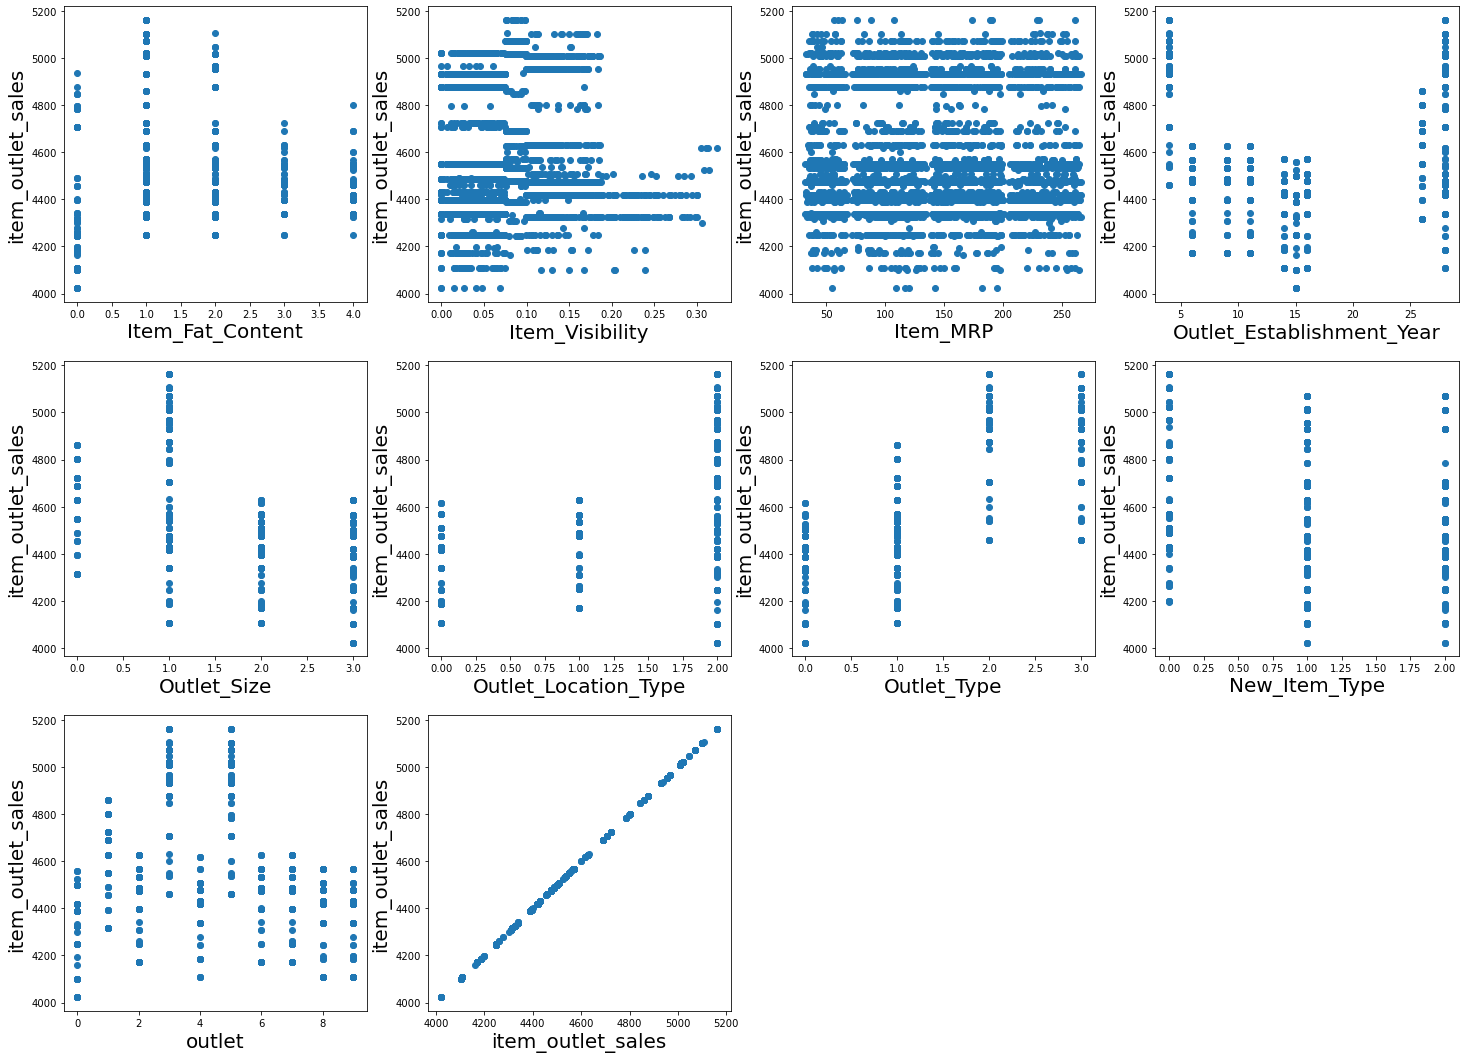

In [97]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for i in df_test.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(df_test[i],df_test['item_outlet_sales'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('item_outlet_sales',fontsize=20)
    plotnumber+=1
plt.show()